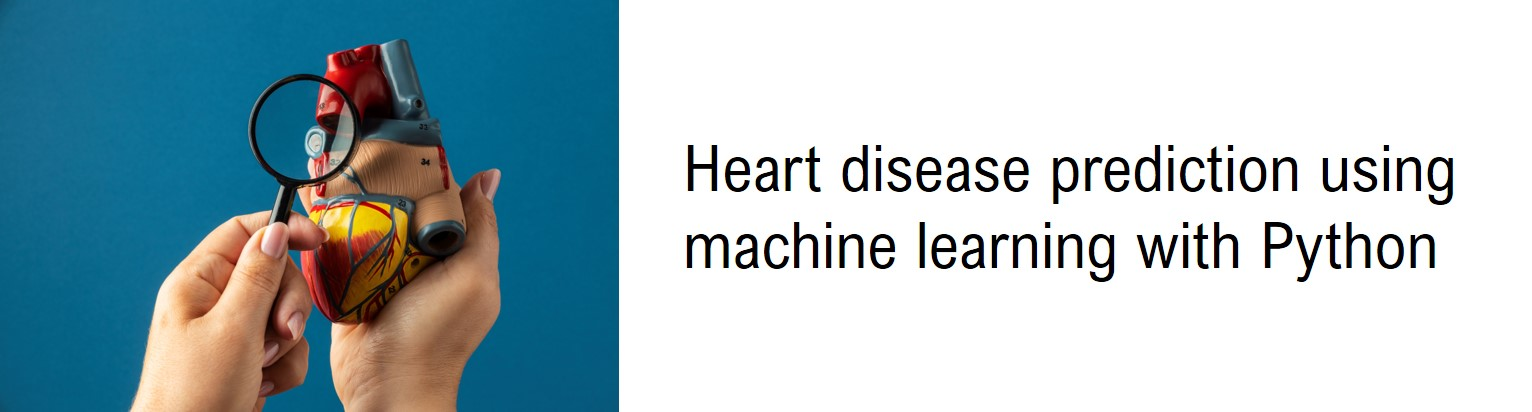
Melvin Galera

**Content:**

**I. Project objective**

**II. Exploratory Data Analysis**

>A. Data Collection

>B. Data Exploration

**III. Machine Learning Models**

>A. KNN Algorithm

>B. Logistic Regression

>C. Decision Tree

**IV. Conclusion**


-------------
<br>

### **I. Project objective**


Coronary heart disease  is the leading cause of disease burden in Australia in 2023 and also in previous years. An estimated 305,000 years of healthy life were lost due to coronary heart disease in 2023, equivalent to 11.5 DALY (disability-adjusted life year) per 1,000 population. As a serious health threat, it is important to identify high-risk patients for heart disease as early as possible to be able to take timely and necessary interventions.

In recent years, machine learning has gained relevance in the medical field on disease prediction. In this regard, this project is aimed at developing predictive models using machine learning for classifying whether a patient is with or without heart disease based on several medical parameters or variables.  

<br>

### **II. Exploratory Data Analysis**

#### **A. Data collection**



The dataset used in this analysis was obtained from the University of California, Irvine Machine learning repository (url: http://archive.ics.uci.edu/dataset/45/heart+disease).

The original source dataset contains patient data concerning heart disease diagnosis collected at several locations around the world, and has 76 attributes, including age, sex, resting blood pressure, cholestoral levels, echocardiogram data, exercise habits, and many others, though all published studies using this dataset focused on a subset of 14 attributes.

In this analysis, a subset of the original dataset was used, specifically the data collected at the Cleveland Clinic Foundation. This dataset contains 303 records/observations and 14 attributes described below:

* `age` :   person's age in years
* `sex` :   person's sex (1 = male, 0 = female)
* `cp` :    chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* `trestbps` :   person's resting blood pressure (mm Hg on admission to the hospital)
* `chol` :   person's cholesterol measurement in mg/dl
* `fbs` :   person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* `restecg` :   resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* `thalach` :   person's maximum heart rate achieved
* `exang` :   exercise induced angina (1 = yes; 0 = no)
* `oldpeak` :   ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* `slope` :   slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* `ca` :   number of major vessels (0-3)
* `thal` : blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* `target` :   with heart disease (0 = no, 1 = yes)


#### **B. Data exploration and visualization**

**1. Loading and preprocessing the dataset**

In [96]:
# import
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import keras
import seaborn as sns
import pylab as pl
from plotnine import *
from IPython.display import display

In [97]:
# Load the data
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column as given in the variables table (http:////archive.ics.uci.edu/ml/datasets/Heart+Disease)
names = ['age', 'sex', 'cp', 'trestbps',
        'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca',
        'thal', 'target']

# read the csv
heart = pd.read_csv(url, names=names, sep= ',')


An initial look at the dataset `heart`

In [98]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [99]:
heart.shape

(303, 14)

In [100]:
heart.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

In [101]:
# all attributes should have numeric values (float64 or int)
# check value types of `ca`
heart['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [102]:
# there are missing data denoted by `?` in the dataset
# replace '?' with NaN
heart = heart.replace('?', np.NaN)

In [103]:
# check for missing values (null values)
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [104]:
# check rows with NaN
heart[pd.isnull(heart).any(axis = 1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [105]:
# drop all rows with missing value (NaN)
heart = heart.dropna()

In [106]:
heart.shape

(297, 14)

In [107]:
# check the values of 'target' (if with heart disease or without)
heart['target'].value_counts()

target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [108]:
# the values of 'target' in the original dataset is from 0-4. 0 means without heart disease and 1-4 refers to how severe the heart disease
# this analysis is a binary classification (0 or 1, without or with)
# hence, convert 'target' to binary class - heart disease or no heart disease
heart.loc[heart['target'] > 0, 'target'] = 1

In [109]:
heart['target'].value_counts()

target
0    160
1    137
Name: count, dtype: int64

In [110]:
heart.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

In [111]:
# transform data to numeric
heart = heart.apply(pd.to_numeric)

In [112]:
heart[['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal', 'target']] = heart[['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal', 'target']].astype(np.int64)

In [113]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [114]:
heart.dtypes

age         float64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [115]:
# numeric variables: age, trestbps, chol, thalach, oldpeak
# factor: sex, cp, fbs, restecg, exang, slope, ca, thal, target    -> transform these from continuous to categorical variables
heart[['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'thal', 'target']] = heart[['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'thal', 'target']].astype('object')

In [116]:
# check for missing data/null
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    object 
 2   cp        297 non-null    object 
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    object 
 6   restecg   297 non-null    object 
 7   thalach   297 non-null    float64
 8   exang     297 non-null    object 
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    object 
 11  ca        297 non-null    int64  
 12  thal      297 non-null    object 
 13  target    297 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 34.8+ KB


**2. Visualizing the features**
                                                 


In [117]:
# determine index for continuous variables
numerical_features = heart.dtypes[heart.dtypes!= 'object'].index

# determine index for categorical variables
categorical_features = heart.dtypes[heart.dtypes == 'object'].index



**A. Univariate plots**

The distributions of the features or attributes of the dataset can be plotted below:

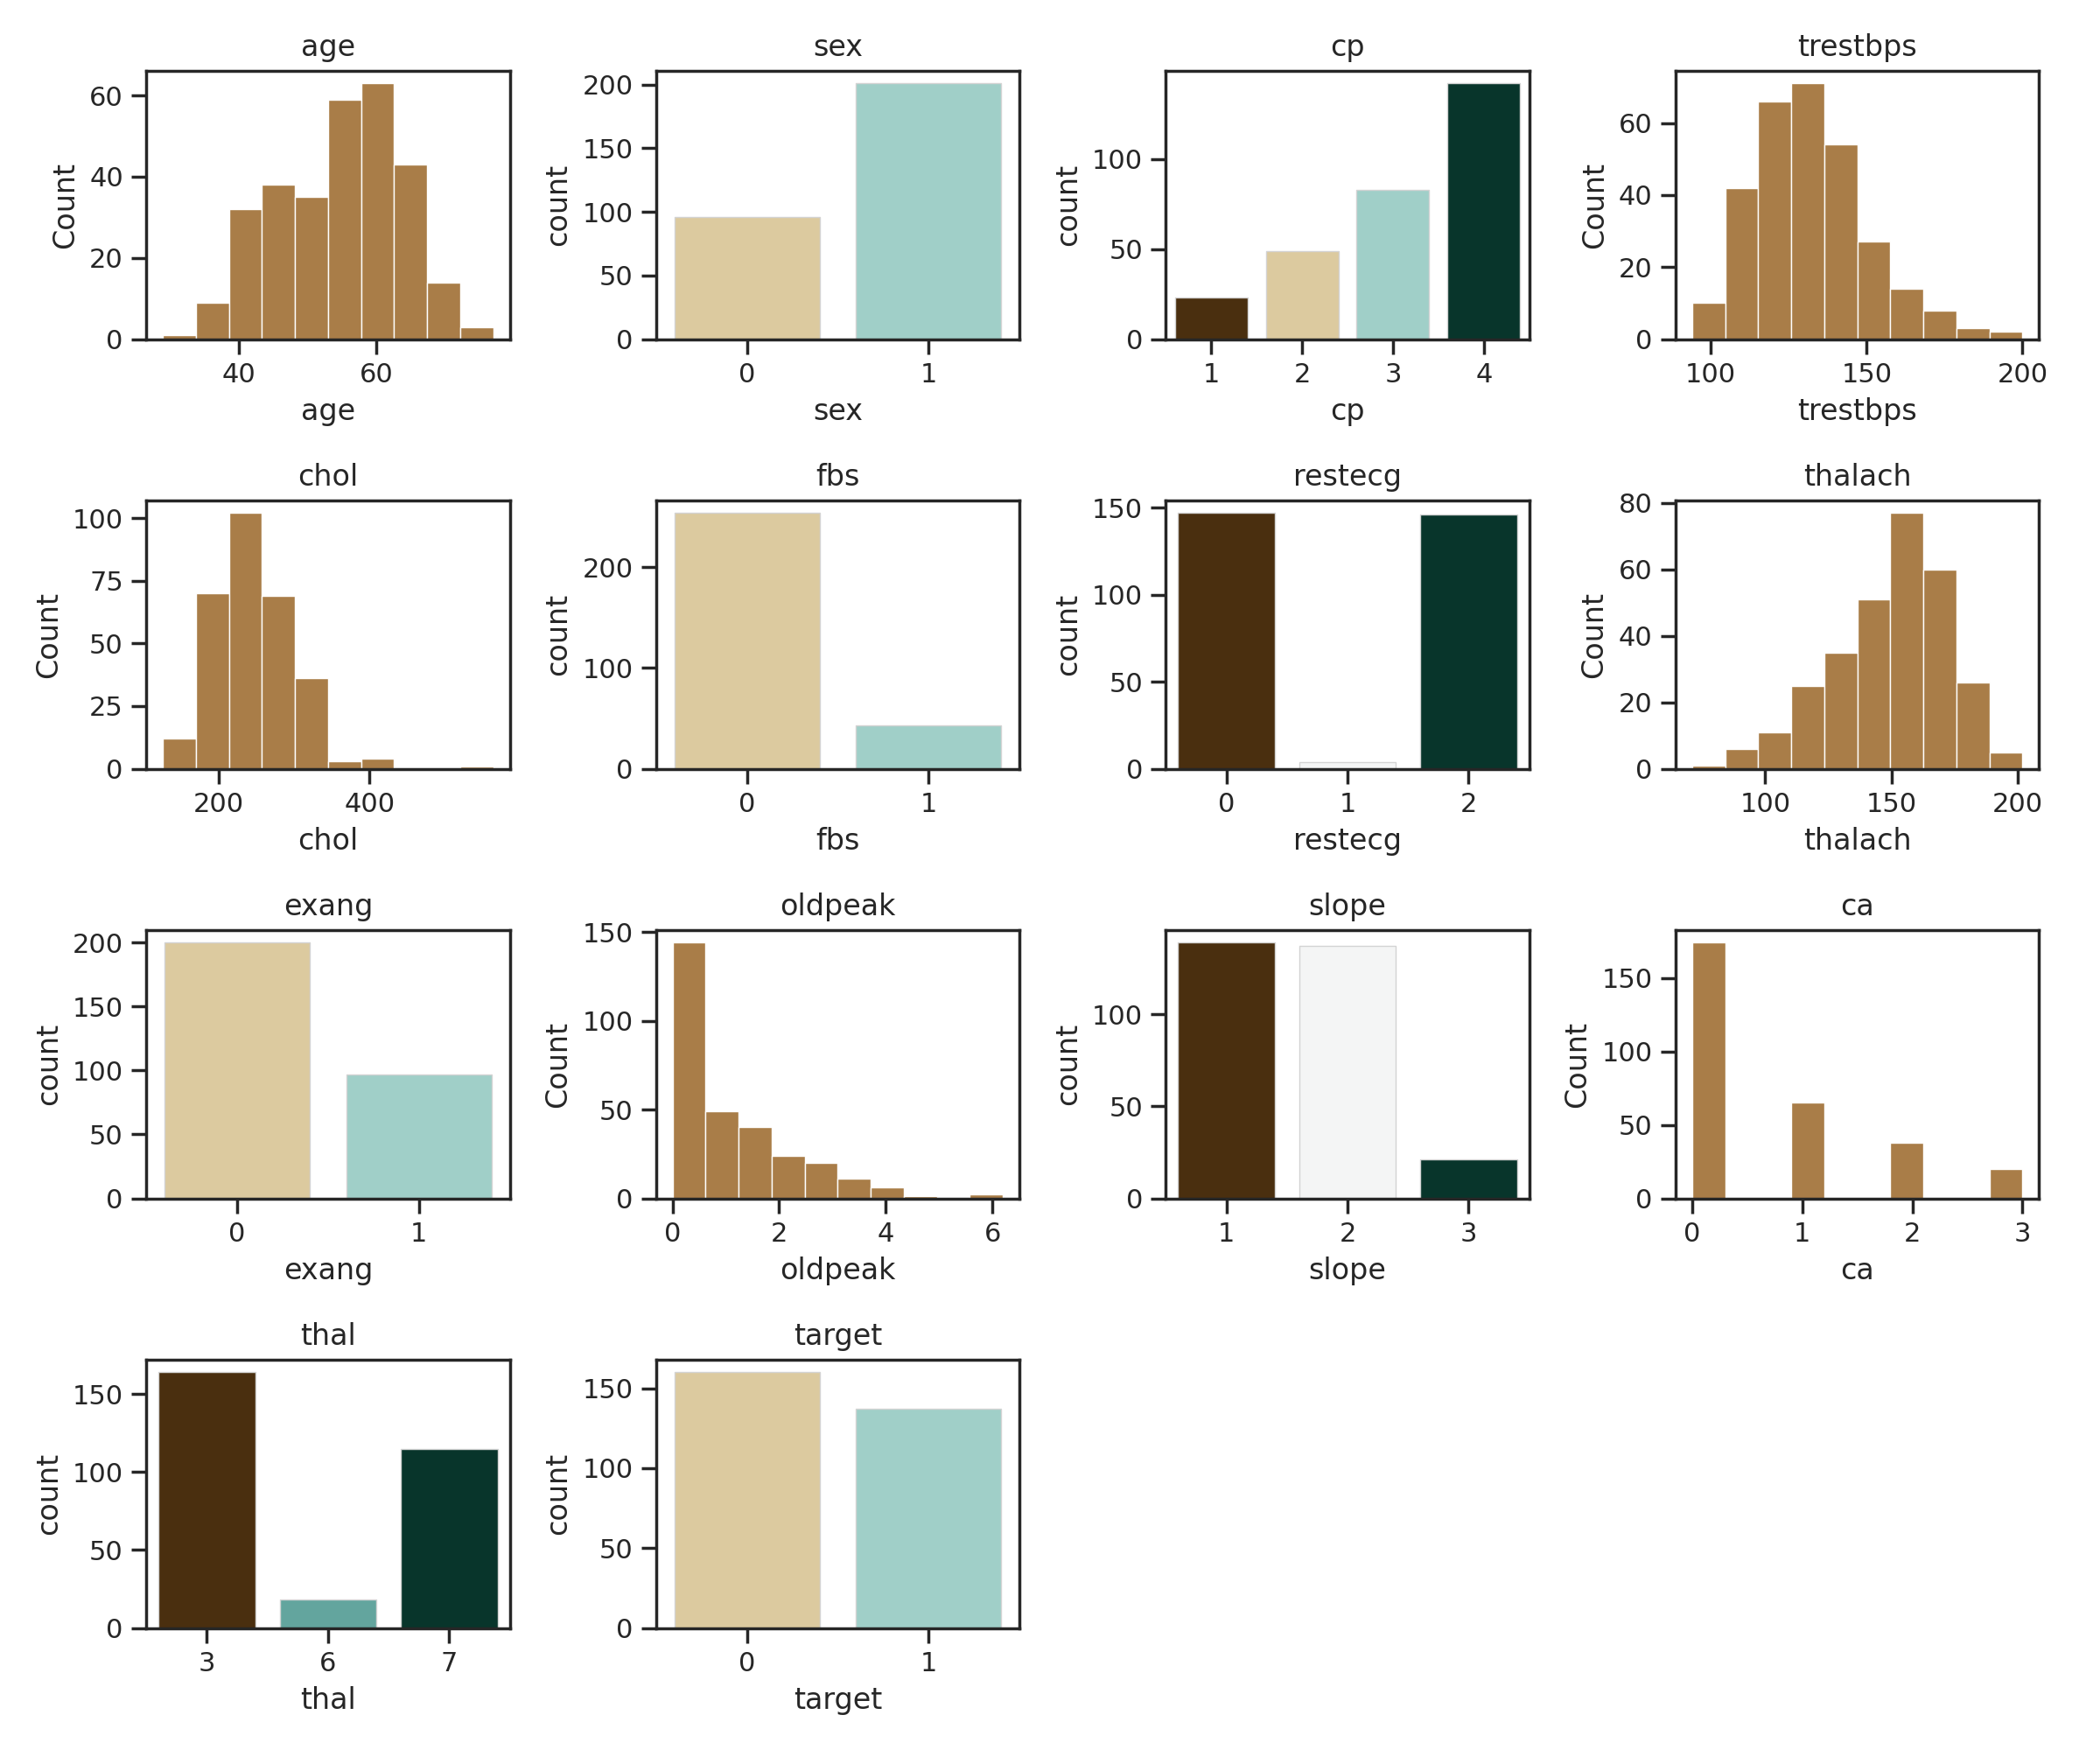

In [118]:
fig, axes = plt.subplots(4, 4, figsize = (12, 10))

for index, columnName in enumerate(heart.columns[0:]):
    ax =axes.reshape(-1)[index]
    if heart[columnName].dtype.kind == 'O':
        a = sns.countplot(x = columnName, data = heart, ax =ax, hue = columnName, palette= 'BrBG', legend=False, edgecolor = "lightgrey", linewidth = 0.5 )
    else:
        b = sns.histplot(x = columnName, data = heart, ax =ax,  color = '#8c510a', legend=False, bins =10, edgecolor = "white", linewidth = 0.5 )
    t = ax.set_title(columnName)
plt.tight_layout()

axes.flat[-2].set_visible(False)
axes.flat[-1].set_visible(False)

Below shows the summary statistics of the features depicted in the plots:

In [119]:
# for numeric variables: age, trestbps, chol, thalach, oldpeak
heart.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


In [120]:
# for factor: sex, cp, fbs, restecg, exang, slope, ca, thal, target
heart.describe(include = 'object')

,sex,cp,fbs,restecg,exang,slope,thal,target
count,297,297,297,297,297,297,297,297
unique,2,4,2,3,2,3,3,2
top,1,4,0,0,0,1,3,0
freq,201,142,254,147,200,139,164,160


**Visualising the features regarding "heart disease" (target = 1)**

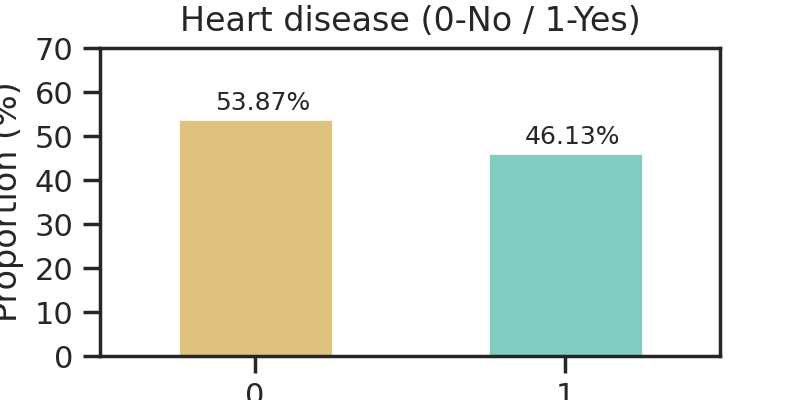

In [121]:
# Plot proportions for each class of 'heart disease'
color = ["#dfc27d", "#80cdc1"]
ax = (heart.target.value_counts()/len(heart)*100).plot(kind = 'bar', color = color, rot = 0, figsize =(4, 2))
ax.set_yticks(np.arange(0, 75, 10))
ax.set_ylabel('Proportion (%)')
ax.set_title('Heart disease (0-No / 1-Yes)')

totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x() + 0.12, i.get_height()+2, str(round((i.get_height()/total)*100, 2))+'%', fontsize = 9)

The plot above shows the proportion of patients without heart disease (160, 53.87%) to those patients with heart disease (137, 46.13%) in the preprocessed dataset. This is slightly balanced dataset.

**B. Bivariate plots**

**Histograms of continuous variables regarding target ("Heart disease")**

In [122]:
# Selecting continuous variables to plot them all together.
heart_cont_plot = heart[['oldpeak', 'trestbps', 'chol', 'thalach', 'age', 'target']]

# Transforming data from wide to long format for our plots.
heart_cont_plot = heart_cont_plot.melt(['target'], var_name='cols',  value_name='vals')
heart_cont_plot.sort_values('target', inplace=True)

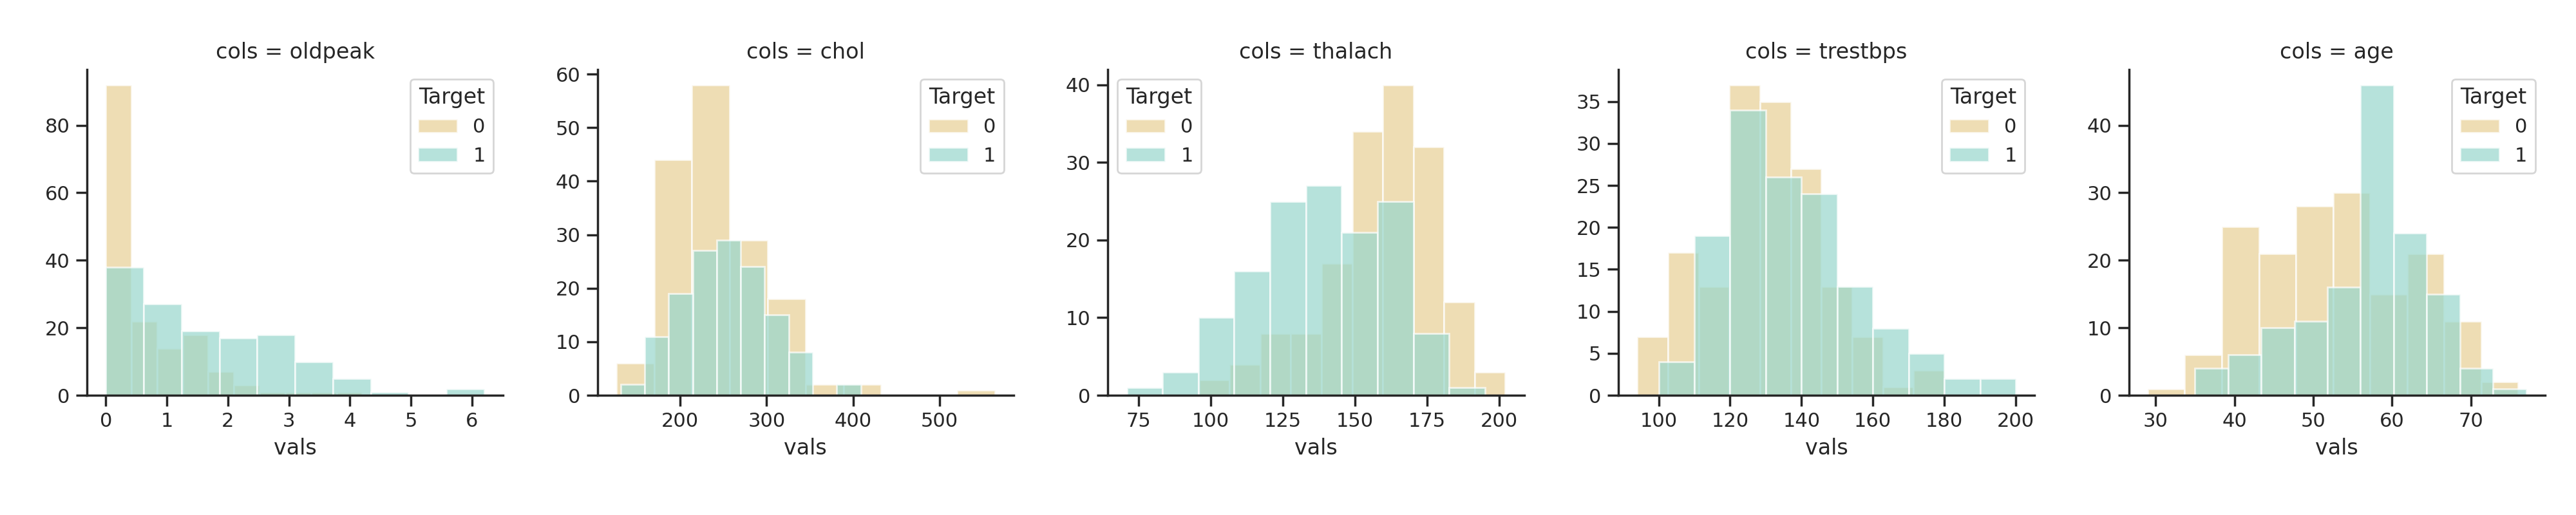

In [123]:
sns.set(style = "ticks", font_scale = 1)

# Plotting the continuous/numeric variables of dataset, regarding 'target'
p = sns.FacetGrid(heart_cont_plot, col='cols', hue= 'target', palette='BrBG', legend_out=False,
                  sharex=False, sharey=False, col_wrap=5)
p = (p.map(plt.hist, "vals", alpha=0.7).add_legend())
p.fig.set_size_inches(20,4)

# Adding the legend to each plot
for ax in p.axes.ravel():
    ax.legend(title="Target")


**Density plots of continuous variables regarding target ("Heart disease")**

The density plots of continuous variables differentiating between patients with  and without heart disease are shown below:

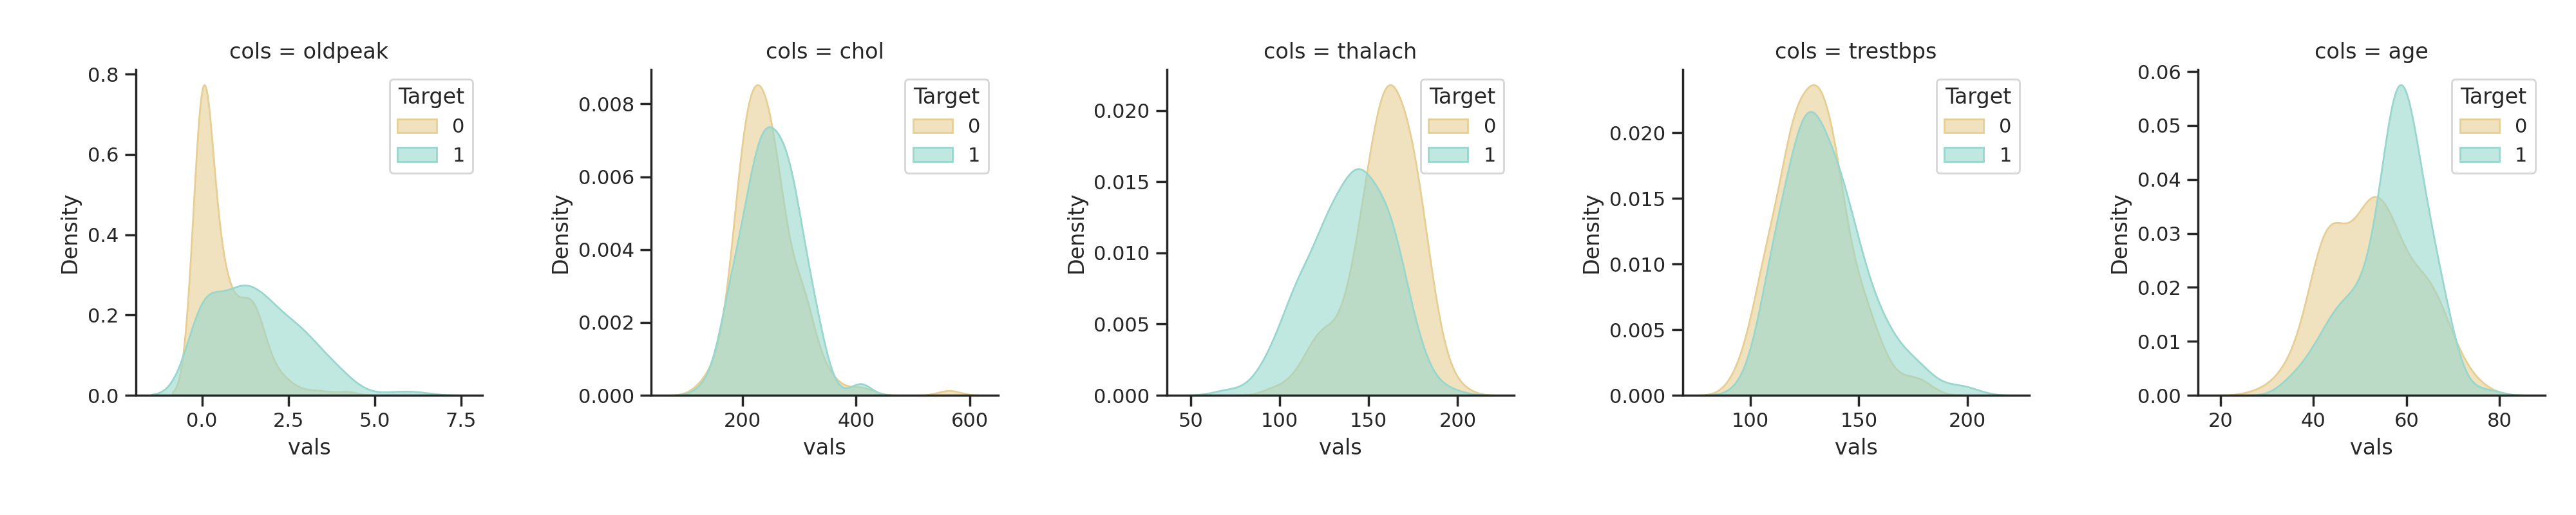

In [124]:
sns.set(style = "ticks", font_scale = 1)

# Plotting the continuous/numeric variables of dataset, regarding 'target'
p = sns.FacetGrid(heart_cont_plot, col='cols', hue= 'target', palette='BrBG', legend_out=False,
                  sharex=False, sharey=False, col_wrap=5)
p = (p.map(sns.kdeplot, "vals", alpha=0.6, fill = True, bw_method = 'scott', bw_adjust = 1).add_legend())
p.fig.set_size_inches(20,4)

# Adding the legend to each plot
for ax in p.axes.ravel():
    ax.legend(title="Target")

**Bar plots of categorical variables regarding target ("Heart disease")**

In [125]:
# create a function to make stacked barplots
def stacked_percent_bar(features, data,
                        outcome_pal = {0: "#dfc27d", 1: "#80cdc1"},
                        title = 'Categorical Features: Differences in the Outcome',
                        label = [0, 1] ):

    # Create the grid of the results
    fig = plt.figure(figsize=(12,5))
    fig.subplots_adjust(hspace=0.5, wspace=0.6)
    fig.suptitle(title, fontsize=10)

    # Loop through each feature in the list
    for i in range(1, len(features)+1):
        # Create frequency counts by the outcome variable, convert into a dataframe
        frequencies_0 = data[features[i-1]][data.target == 0].value_counts()
        frequencies_1 = data[features[i-1]][data.target == 1].value_counts()
        freq_df = pd.concat([frequencies_0.sort_index(),frequencies_1.sort_index()],axis=1).transpose()

        # Normalise the frequencies (%)
        totals = [a+b for a,b in zip(freq_df.iloc[0,:], freq_df.iloc[1,:])]
        norm_0 = [a / b * 100 for  a,b in zip(freq_df.iloc[0,:], totals)]
        norm_1 = [a / b * 100 for  a,b in zip(freq_df.iloc[1,:], totals)]

        # add a subplot with the dimensions we need to visualise results
        ax = fig.add_subplot(2, 4, i)

        # 'No' cases Bars
        ax.bar(x = list(freq_df.columns), # Bar positions
               height = norm_0, # Bar heights
               color=outcome_pal[0], edgecolor='white',
               alpha=0.75,
               label=label[0]) # Class label

        # 'Yes' cases Bars
        ax.bar(x = list(freq_df.columns), # Bar positions
               height = norm_1, # Bar heights
               bottom=norm_0,   # Stacked bar graph with 'no' cases on the bottom
               color=outcome_pal[1], edgecolor='white',
               alpha=0.75,
               label=label[1])  # Class label

        # Set axes, labels and title
        ax.set_xticks(frequencies_0.index)
        ax.set_ylabel('%')
        ax.set_title(features[i-1])
        ax.axhline(y=50, ls='--', color='black')
        plt.setp(ax.get_xticklabels(), rotation=0)

    # Set the legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels,  loc='right', title='Target')


In [126]:
# Selecting categorical variables to plot them all together.
heart_categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']  # include ca

In [127]:
heart_cat = heart[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'target']]

In [128]:
heart_cat = heart_cat.astype('category')

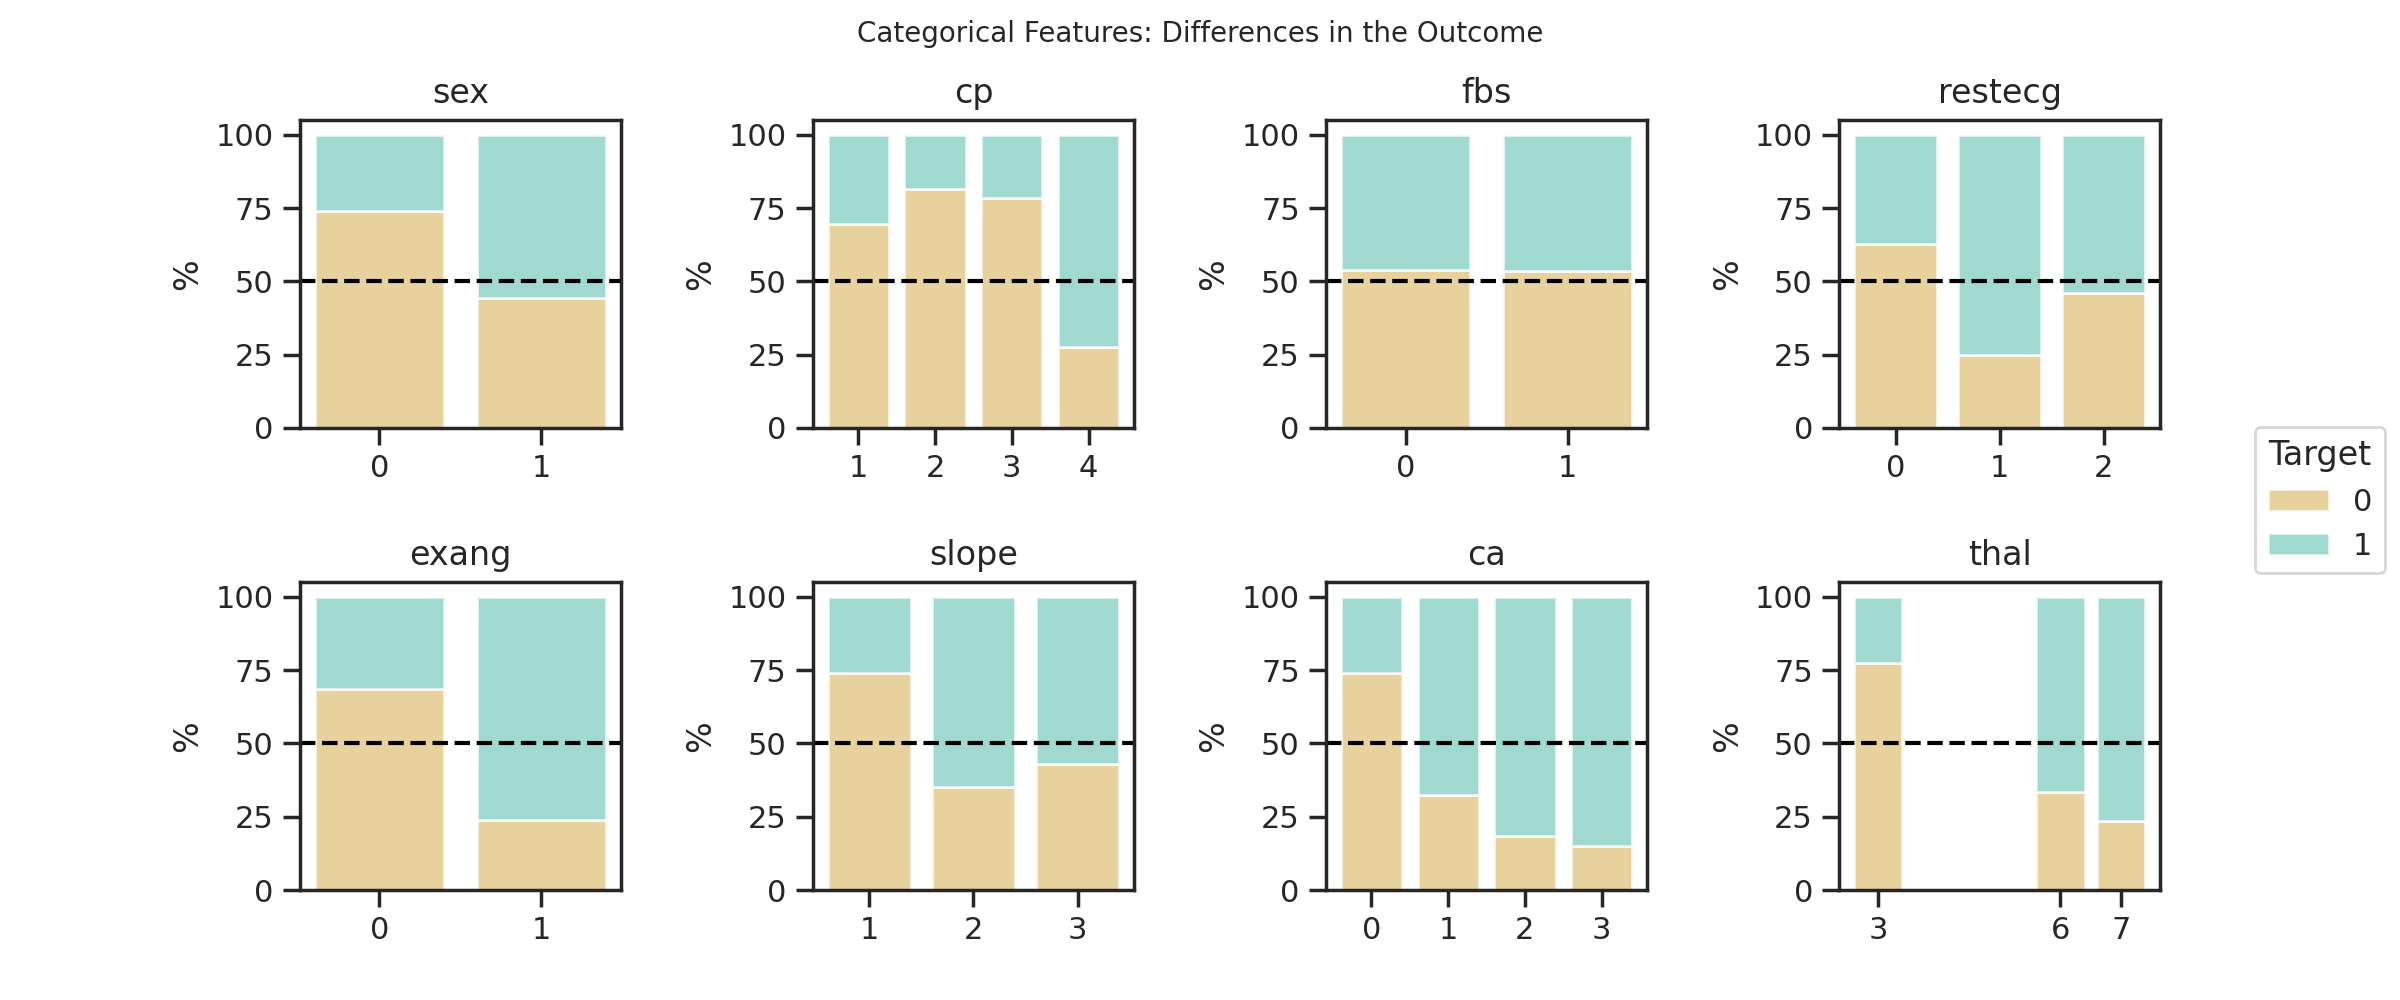

In [129]:
stacked_percent_bar(features=heart_categorical_features, data=heart_cat)

**C. Correlation plot**

The figure below shows the low correlation among the continuous variables.

<Axes: >

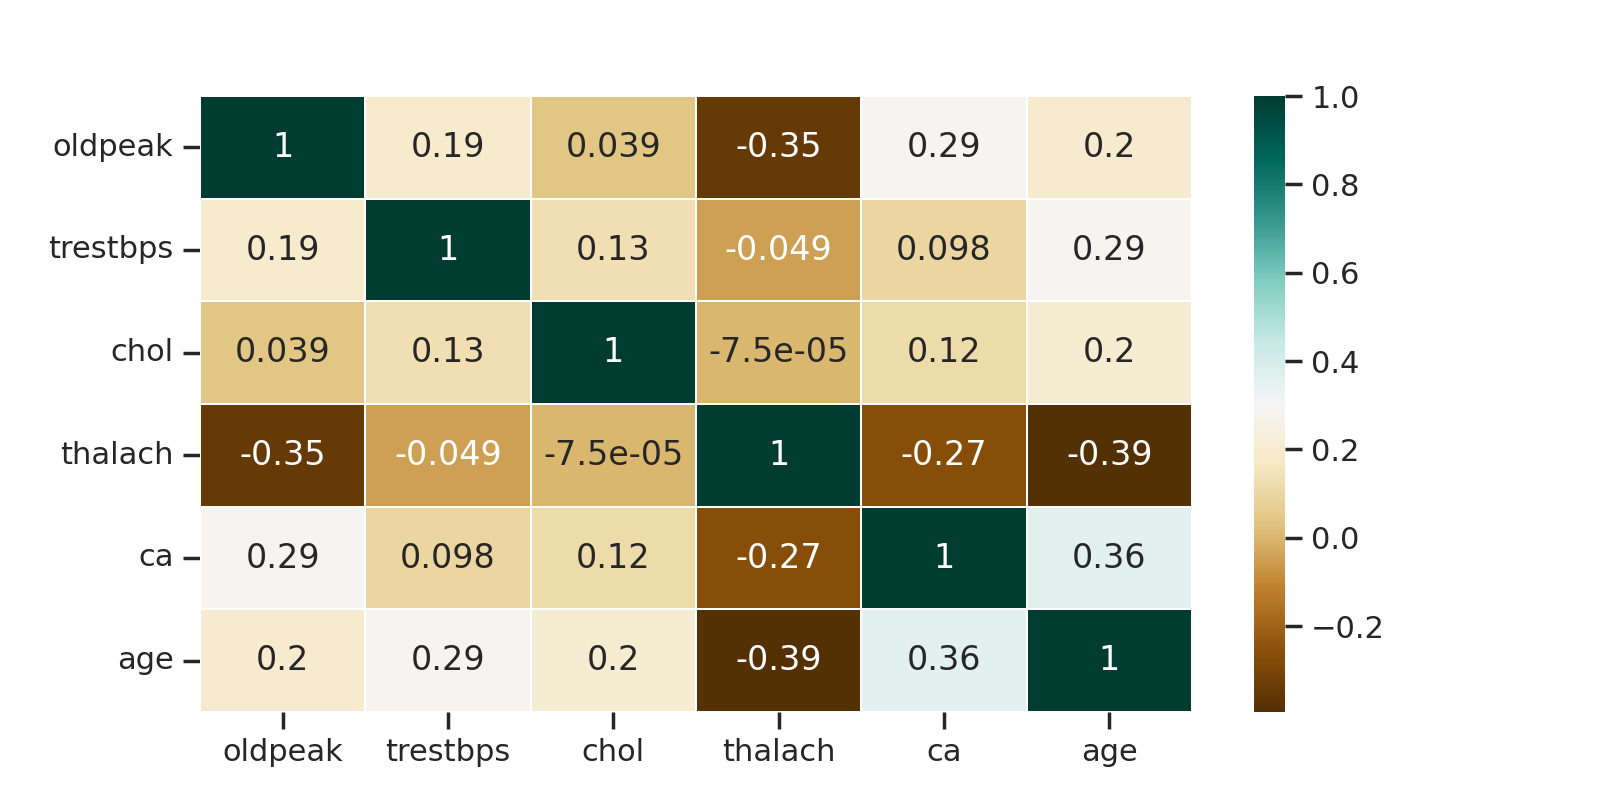

In [130]:
heart_cont_plot2 = heart[['oldpeak', 'trestbps', 'chol', 'thalach', 'ca', 'age']]


f, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(heart_cont_plot2.corr(), linewidths = 0.1, annot = True, ax = ax, cmap = 'BrBG')

<br>

### **III. Machine Learning Models**

This project involves a classification problem where machine learning methods can be applied. For this analysis, three methods will be evaluated:

1. KNN algorithm
2. Logistic regression
3. Decision tree

#### **A. Splitting the dataset**

Prior to splitting the dataset to training and tests sets, a technique called one-hot encoding needs to be done to transform categorical variables and create dummy variables.

**1. Hot encoding: Creating dummy variables**

In [131]:
# save target
target = heart['target'].astype('int64')

In [132]:
# drop target and create dummies
heart = pd.get_dummies(heart.drop('target', axis= 1), dtype=int)
# add target back into heart
heart['target'] = target

In [133]:
heart.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_1,cp_2,...,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3,thal_6,thal_7,target
0,63.0,145.0,233.0,150.0,2.3,0,0,1,1,0,...,1,1,0,0,0,1,0,1,0,0
1,67.0,160.0,286.0,108.0,1.5,3,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
2,67.0,120.0,229.0,129.0,2.6,2,0,1,0,0,...,1,0,1,0,1,0,0,0,1,1
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,1,...,1,1,0,1,0,0,1,0,0,0


**2. Training and Test sets**

Split the dataset into training data set and test data set (80:20).

In [134]:
# Split heart dataset into two dataframes: features stored in X and target stored in y
X = heart.drop(['target'], axis = 1)
y = heart[['target']]

In [135]:
X.shape

(297, 25)

In [136]:
y.shape

(297, 1)

In [137]:
X.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_0', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_1', 'slope_2',
       'slope_3', 'thal_3', 'thal_6', 'thal_7'],
      dtype='object')

In [138]:
y.columns

Index(['target'], dtype='object')

In [139]:
# Split data into 80% training set and 20% test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

In [140]:
X_train.shape

(237, 25)

In [141]:
X_test.shape

(60, 25)

**3. Standardised the features**

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [143]:
# Standardize features by removing the mean and scaling to unit variance.
# In this step, calculate the actual means and variances for each feature in  THE TRAIN SET.
# mu-training-set = mean of the age in the training set
# sigma-training-set = standard deviation of the age in the training set
scaler.fit(X_train)


StandardScaler()

In [144]:
# rescale the training data
X_train_scaled = scaler.transform(X_train)
# (X_train - mu-training-set )/sigma-training-set

In [145]:
# Check
X_train_scaled

array([[-0.08566824, -0.46258178,  0.31273699, ..., -1.06542721,
        -0.26906912,  1.22259431],
       [-0.97324741, -1.74907836, -0.9879212 , ..., -1.06542721,
        -0.26906912,  1.22259431],
       [-1.3060896 , -0.12697398,  1.2363928 , ...,  0.93859064,
        -0.26906912, -0.81793281],
       ...,
       [ 0.91285833, -0.46258178, -0.9879212 , ...,  0.93859064,
        -0.26906912, -0.81793281],
       [ 0.58001614,  1.43919576,  1.04789162, ...,  0.93859064,
        -0.26906912, -0.81793281],
       [-1.63893179,  1.10358796, -0.49781811, ..., -1.06542721,
        -0.26906912,  1.22259431]])

In [146]:
# To apply predictive models to the scaled data, we also need to transform the test set
# scale the test data
# (X_test - mu-training-set )/sigma-training-set
X_test_scaled = scaler.transform(X_test)


In [147]:
# Check
X_test_scaled

array([[-1.5279844 , -0.68632032, -1.74192594, ...,  0.93859064,
        -0.26906912, -0.81793281],
       [-0.64040523, -0.12697398,  0.36928735, ...,  0.93859064,
        -0.26906912, -0.81793281],
       [ 1.24570052, -0.68632032,  0.99134126, ...,  0.93859064,
        -0.26906912, -0.81793281],
       ...,
       [-0.30756304,  0.09676456, -0.91252072, ...,  0.93859064,
        -0.26906912, -0.81793281],
       [ 0.13622655, -0.68632032, -0.1773661 , ...,  0.93859064,
        -0.26906912, -0.81793281],
       [-1.417037  ,  0.20863382,  1.2363928 , ..., -1.06542721,
         3.71651719, -0.81793281]])

After splitting the dataset:

* **training set:**     X_trained_scaled, y_train2
* **test set:**         X_test_scaled, y_test

----------

#### **B. KNN algorithm**

The K-Nearest Neighbors (KNN) algorithm is a popular non-prametric supervised ML technique than can be used for both classification and regression tasks - based on the simple idea that similar data points tend to have similar labels or values.

**1. Building KNN model**

Use the training data set to build and train the KNN model.

In [148]:
# convert y_train from a column vector to a row vector that KNN algorithm expects:
y_train2=y_train.values.ravel()
print(y_train2)

[1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1
 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1
 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1
 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1]


In [149]:
# find suitable K value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k=[i for i in range(1,31)]
accuracy=[]

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train2)
    y_pred = knn.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, y_pred))

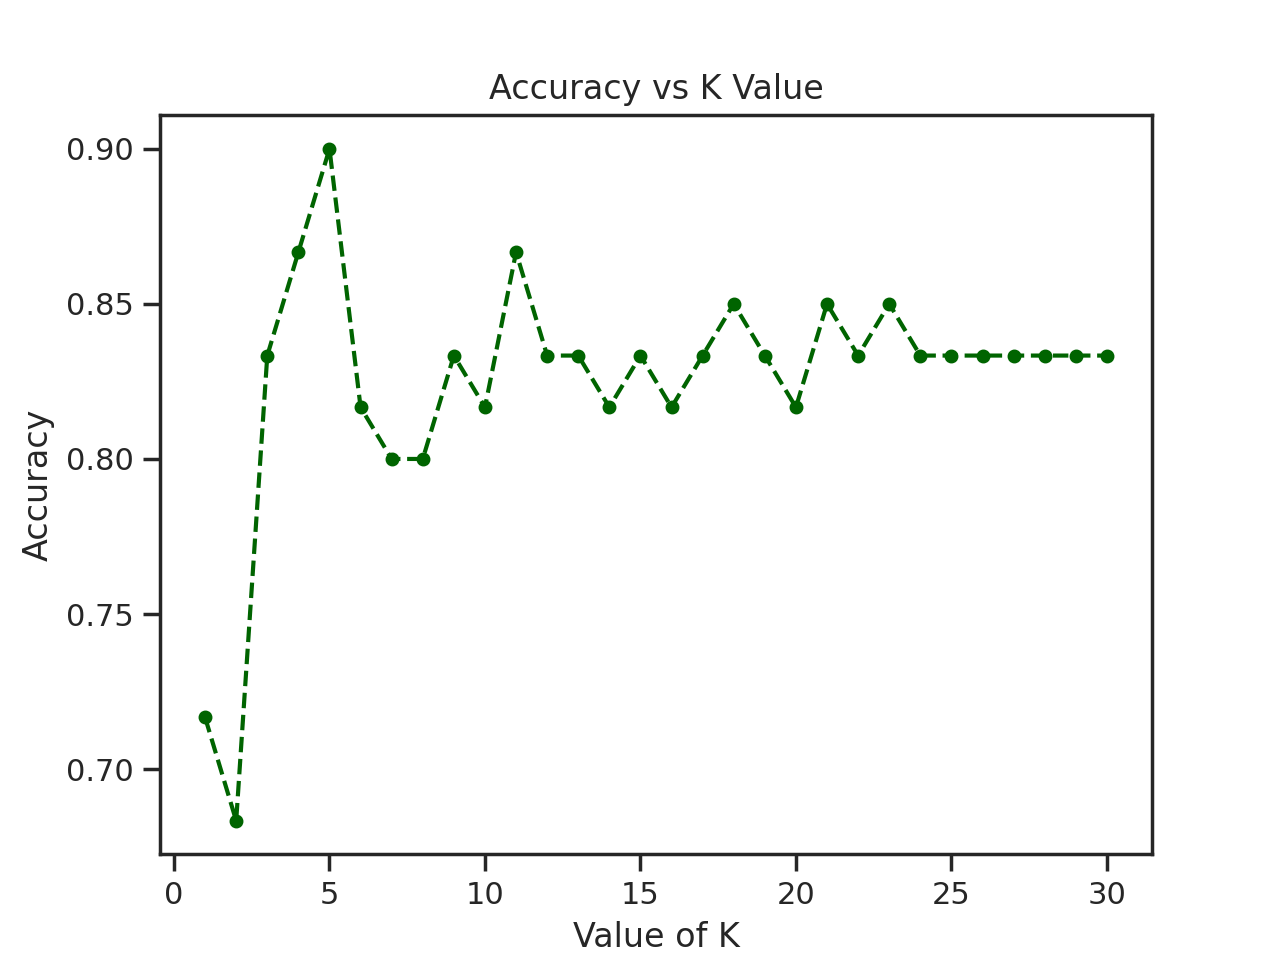

In [150]:
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value")
plt.plot(k,accuracy,color='darkgreen', linestyle='dashed', marker='o', markersize=4)

Based on the above plot, use K= 5.

In [151]:
# use 5 neighbors, K= 5, to create themodel
knn = KNeighborsClassifier(n_neighbors=5)

In [152]:
# fit the training data
knn.fit(X_train_scaled, y_train2)

KNeighborsClassifier()

**2. Evaluating the KNN model**

Use the test  data set to evaluate the model

In [153]:
y_pred = knn.predict(X_test_scaled)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1]


Determine the KNN score:

In [154]:
print("Test set score: {:.2f}".format(knn.score(X_test_scaled, y_test)))

Test set score: 0.90


In [155]:
print('No:', sum(y_test.target==0), ' ','Yes:',sum(y_test.target==1))

No: 32   Yes: 28


In [156]:
print('No:', sum(y_pred==0), ' ','Yes:',sum(y_pred==1))

No: 34   Yes: 26


**a. Confusion matrix for the KNN algorithm**:

[Text(0, 0.5, '0-No'), Text(0, 1.5, '1-Yes')]

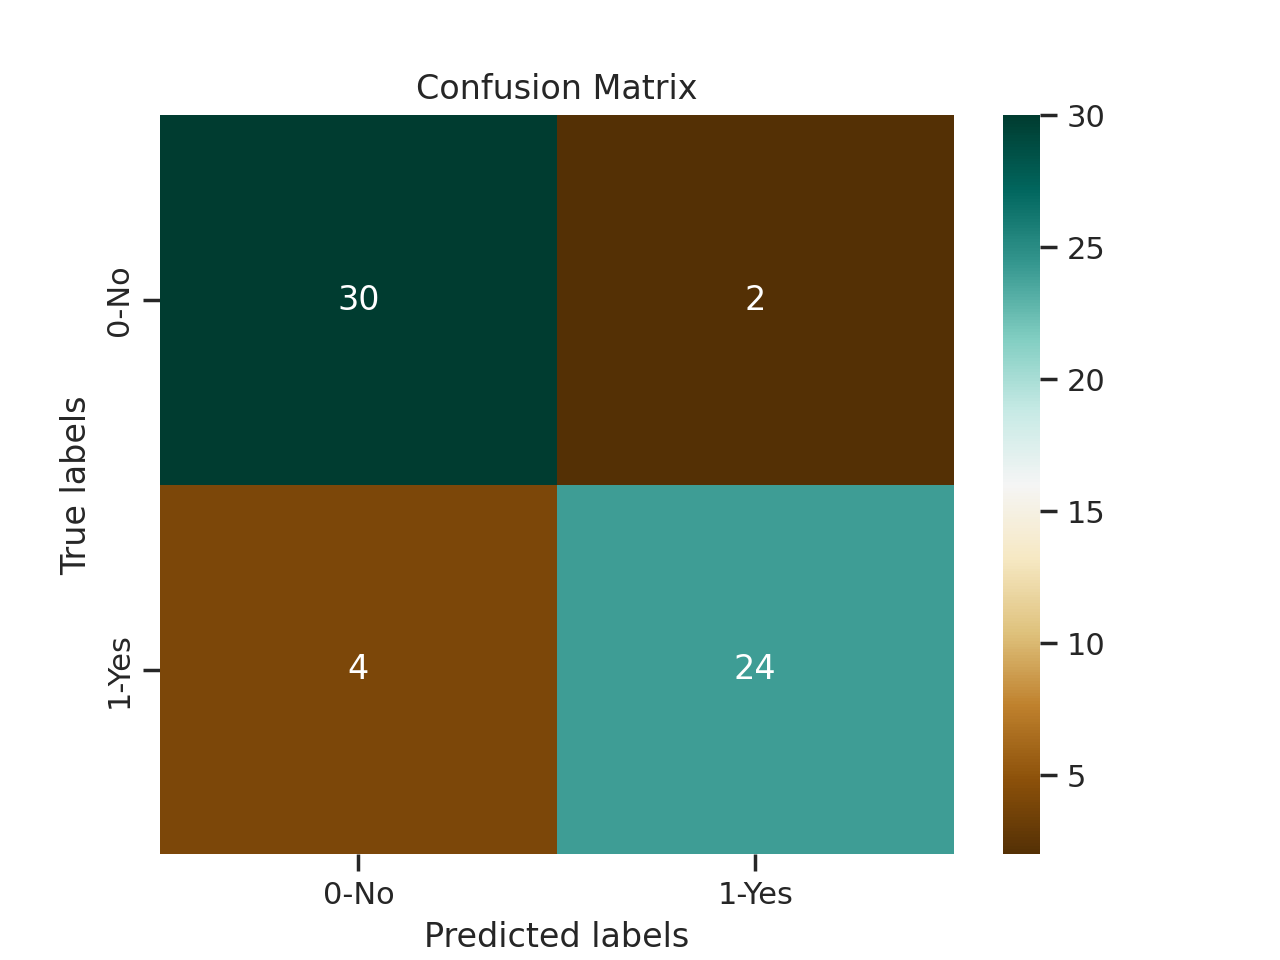

In [157]:
from sklearn import metrics


# Confusion Matrix
confusion = metrics.confusion_matrix(y_test, y_pred)

# Visualising the confusion matrix of our KNN model
labels = {'0-No', '1-Yes'}
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='.0f', ax= ax, cmap="BrBG")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0-No', '1-Yes']); ax.yaxis.set_ticklabels(['0-No', '1-Yes'])

In [158]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, pos_label=1, average='binary')

0.888888888888889

**b. Classification report for the KNN algorithm:**

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.92      0.86      0.89        28

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



The **accuracy using the KNN  algorithm is 90% and the F1 score (harmonic mean of precision and recall) is 89% (for class 1 - with heart disease)**. Considering that the analysis is for classifying a patient as with heart disease or without, F1 is the better metric (false negatives are of high cost or crucial and should be minimised).

---

#### **C. Logistic regression**


Logistic regression is a supervised ML algorithm used for binary classification tasks by predicting the probability of an outcome, event, or observation.

**1. Building the logistic regression models**

 Use the training data set to build and train the regression models. Two regression models will be fitted: one using L1-norm regularization (Lasso), and the onother using L2-norm regularization (Ridge).

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
# Training a logistic regression model using L1-norm regularization (Lasso)
# C= 0.01 as first step
Log_Reg_L1 = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear')
Log_Reg_L1.fit(X_train_scaled, y_train2)


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [162]:
# Training a logistic regression model using L2-norm regularization (Ridge)
# C= 0.01 as first step
Log_Reg_L2 = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear')
Log_Reg_L2.fit(X_train_scaled, y_train2)

LogisticRegression(C=0.1, solver='liblinear')

In [163]:
# check the coefficient
Log_Reg_L1.coef_

array([[ 0.        ,  0.02110888,  0.        , -0.03180325,  0.29627654,
         0.49637234, -0.00213131,  0.04363259,  0.        ,  0.        ,
        -0.01545936,  0.54798094,  0.        ,  0.        , -0.06412372,
         0.        ,  0.        , -0.00493075,  0.13671864, -0.2236857 ,
         0.        ,  0.        , -0.27976344,  0.        ,  0.33624785]])

In [164]:
# check the coefficient
Log_Reg_L2.coef_

array([[ 0.0637763 ,  0.25604064,  0.15674035, -0.17684486,  0.33617993,
         0.60546321, -0.2106427 ,  0.2106427 , -0.13960372, -0.0436147 ,
        -0.32679881,  0.39968724,  0.04876498, -0.04876498, -0.11991361,
         0.02719751,  0.11388117, -0.13032164,  0.13032164, -0.22270734,
         0.19336579,  0.05997038, -0.3159511 , -0.07704425,  0.36115196]])

**2. Evaluating the logistic regression models**

Use the test  data set to evaluate the models:

In [165]:
# For L1-norm (Lasso)
y_pred_L1 = Log_Reg_L1.predict(X_test_scaled)

# For L2-norm (Ridge)
y_pred_L2 = Log_Reg_L2.predict(X_test_scaled)

In [166]:
# Use score method to get accuracy
score_L1 = round(Log_Reg_L1.score(X_test_scaled, y_test), 3)
score_L2 = round(Log_Reg_L2.score(X_test_scaled, y_test), 3)
print('score_L1: ', score_L1)
print('score_L2: ', score_L2)

score_L1:  0.833
score_L2:  0.833


**a. Confusion matrix for the logistic regression models**

[Text(0, 0.5, '0-No'), Text(0, 1.5, '1-Yes')]

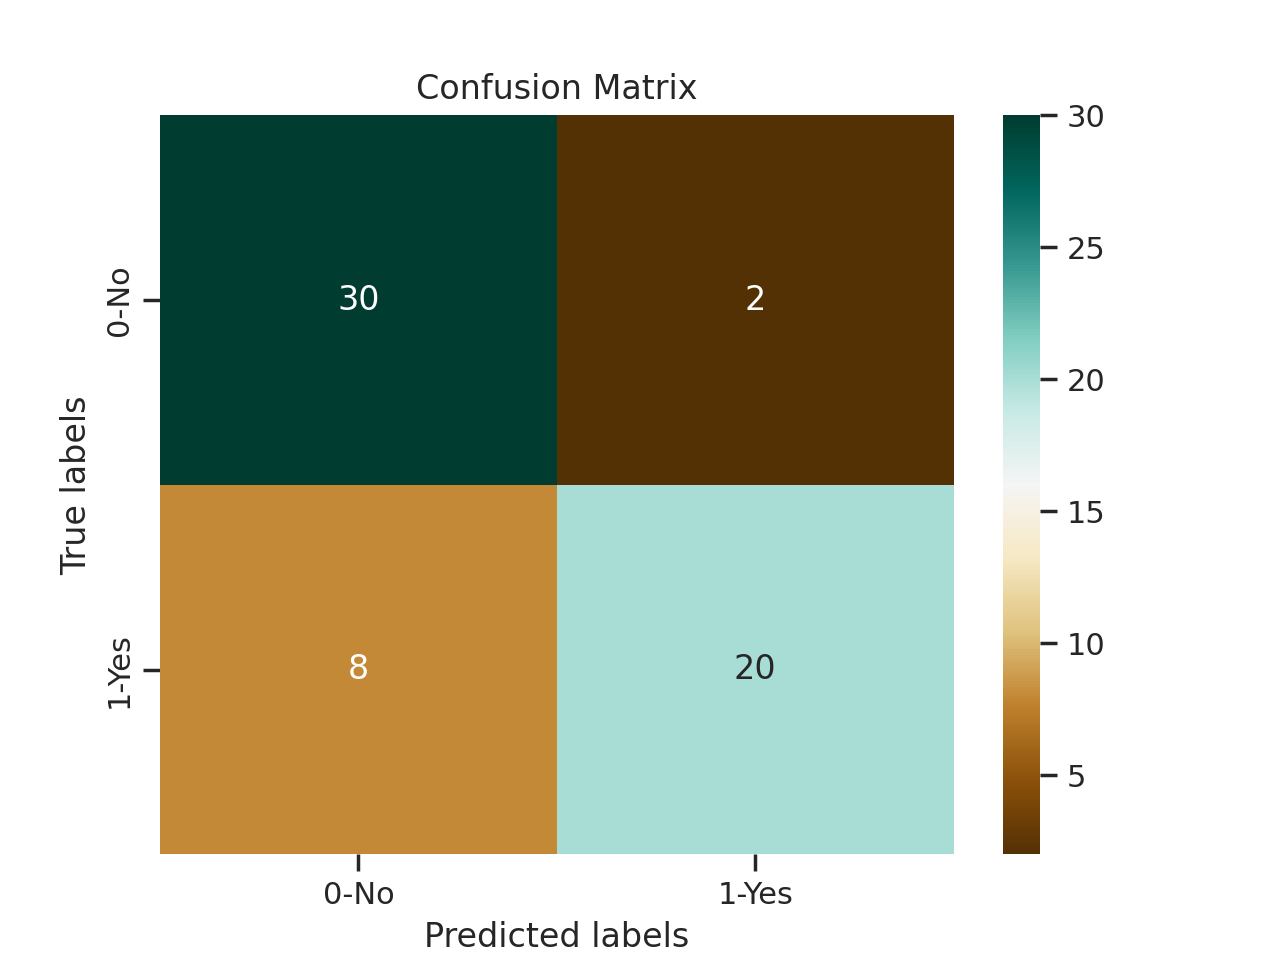

In [167]:
# Confusion Matrix for Lasso - L1-norm
confusion_L1 = metrics.confusion_matrix(y_test, y_pred_L1)

# Visualising the confusion matrix
labels = {'0-No', '1-Yes'}
ax= plt.subplot()
sns.heatmap(confusion_L1, annot=True, fmt='.0f', ax= ax, cmap="BrBG")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0-No', '1-Yes']); ax.yaxis.set_ticklabels(['0-No', '1-Yes'])

[Text(0, 0.5, '0-No'), Text(0, 1.5, '1-Yes')]

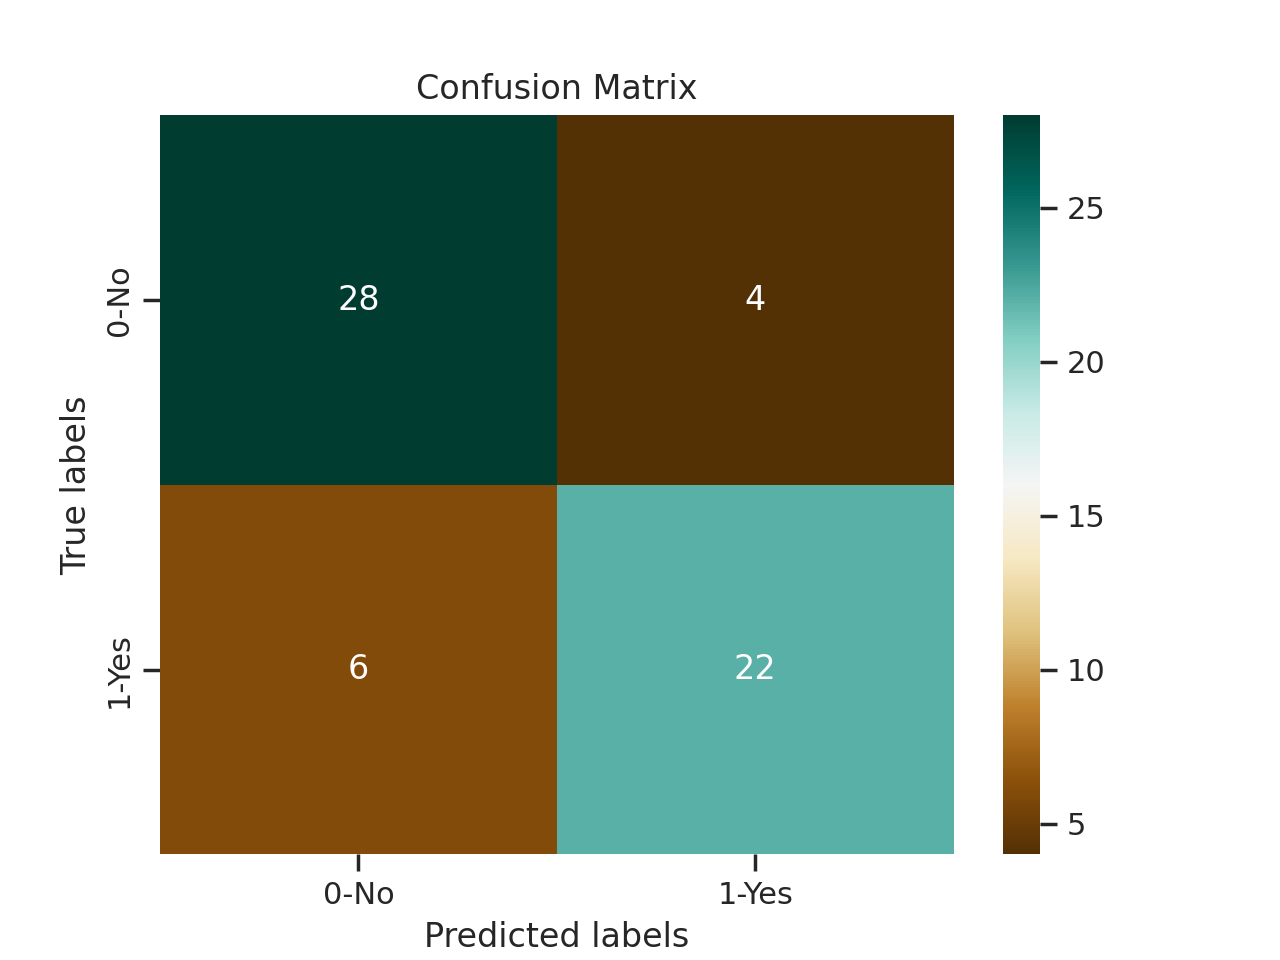

In [168]:
# Confusion Matrix for Ridge - L2-norm
confusion_L2 = metrics.confusion_matrix(y_test, y_pred_L2)

# Visualising the confusion matrix
labels = {'0-No', '1-Yes'}
ax= plt.subplot()
sns.heatmap(confusion_L2, annot=True, fmt='.0f', ax= ax, cmap="BrBG")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0-No', '1-Yes']); ax.yaxis.set_ticklabels(['0-No', '1-Yes'])

**b. Classification report for the logistic regression models**

In [169]:
# Classification Report
print(classification_report(y_test, y_pred_L1))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



In [170]:
print(classification_report(y_test, y_pred_L2))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



Logistic regression using L1-Lasso and L2-Ridge regularizations have **both accuracies at 83%.** Using L1-Lasso and L2-Ridge, the **F1 scores are 80% and 81%, respectively**.  

**c. Probability associated with each prediction - ROC curve and AUC**

In [171]:
# Probabilities of the test set being 0 and 1: LASSO
y_pred_proba_L1 = Log_Reg_L1.predict_proba(X_test_scaled)[:,1]
y_pred_L1

print(y_pred_proba_L1[:5])
print(y_pred_L1[:5])

[0.10652063 0.25172157 0.4231527  0.39722748 0.41975936]
[0 0 0 0 0]


In [172]:
# Probabilities of the test set being 0 and 1: Ridge
y_pred_proba_L2 = Log_Reg_L2.predict_proba(X_test_scaled)[:,1]
y_pred_L2

print(y_pred_proba_L2[:5])
print(y_pred_L2[:5])

[0.04710974 0.09075763 0.54509587 0.26562129 0.39204543]
[0 0 1 0 0]


In [173]:
# Determining the fpr and tpr at each threshold value for logistic regression using Lasso
fpr, tpr,thresholds= metrics.roc_curve(y_true = y_test, y_score = y_pred_proba_L1)

# Defining dataframe with fpr and tpr at each threshold value for logistic regression using Lasso
df = pd.DataFrame()
df['fpr'] = fpr
df['tpr'] = tpr

# Check
print(thresholds[:5])

[1.96604569 0.96604569 0.7185568  0.697903   0.48657296]


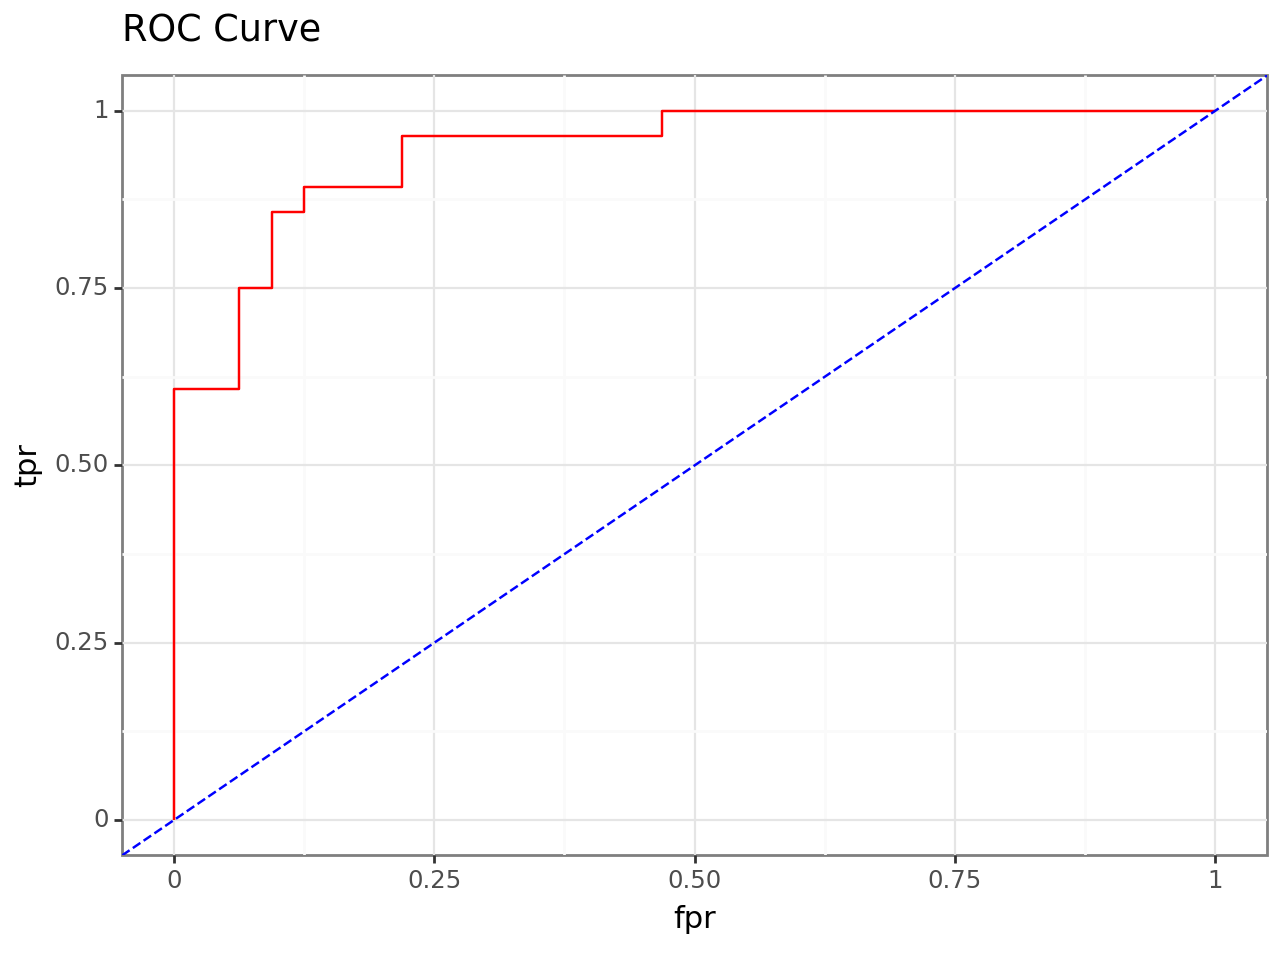

In [174]:
from plotnine import *
import warnings; warnings.simplefilter('ignore')

p = ggplot(mapping = aes(x = fpr, y = tpr), data = df)
p += geom_line(color = 'red')
p += geom_abline(aes(intercept=0, slope=1), linetype = 'dashed', colour = 'blue')
p += labs(title = 'ROC Curve', x = 'fpr', y = 'tpr')
p += theme_bw()

print(p)

In [175]:
# Area Under the ROC curve (AUC) -RIDGE
print(round(metrics.roc_auc_score(y_true = y_test, y_score = y_pred_proba_L1),3))

0.944


In [176]:
# Determining the fpr and tpr at each threshold value for logistic regression using Ridge
fpr, tpr,thresholds= metrics.roc_curve(y_true = y_test, y_score = y_pred_proba_L2)

# Defining dataframe with fpr and tpr at each threshold value for logistic regression using Lasso
df_l2 = pd.DataFrame()
df_l2['fpr'] = fpr
df_l2['tpr'] = tpr

# Check
print(thresholds[:5])

[1.98958699 0.98958699 0.87074285 0.86923811 0.73521173]


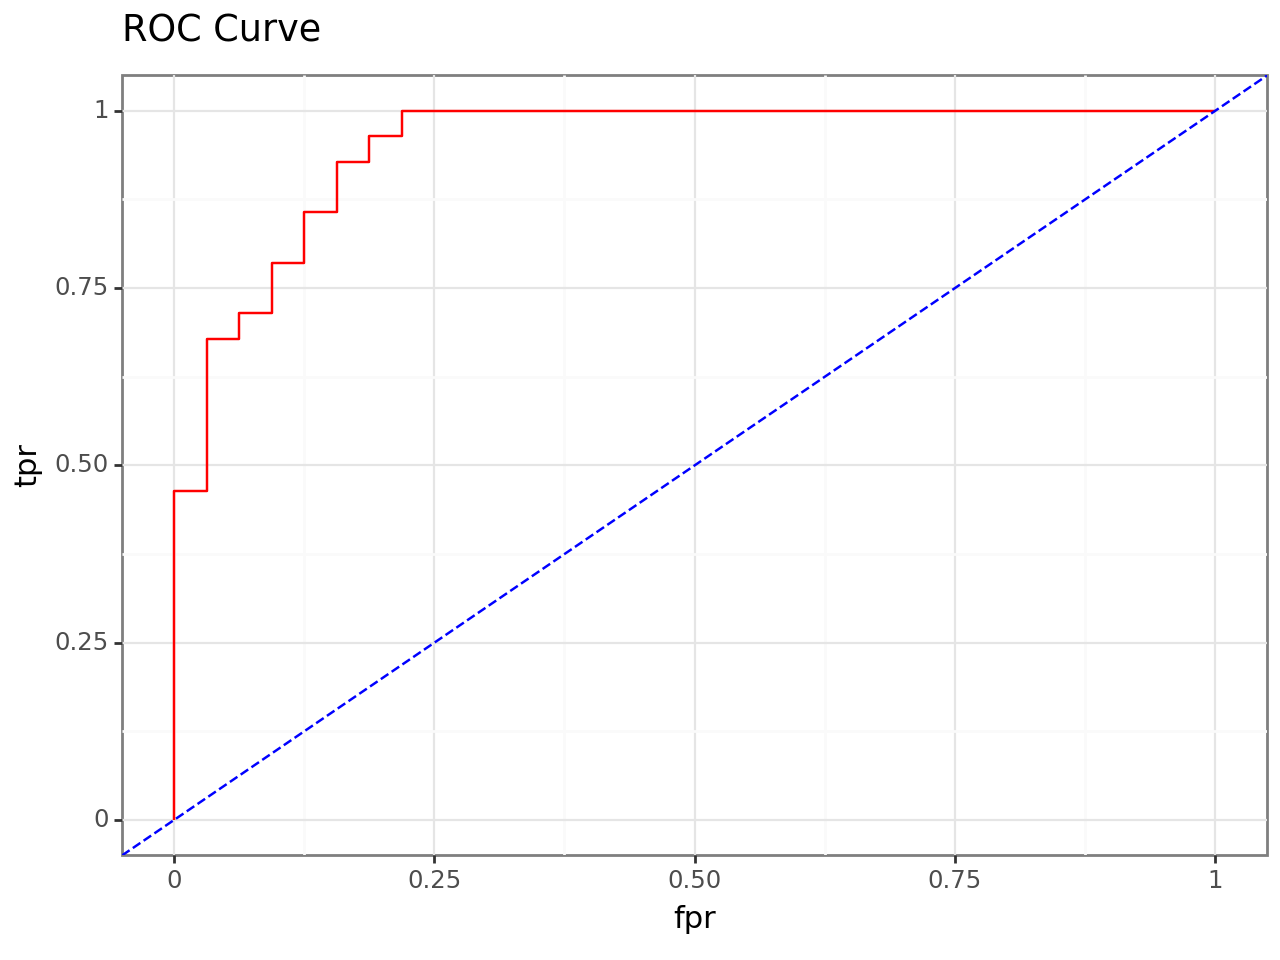

In [177]:
from plotnine import *
import warnings; warnings.simplefilter('ignore')

p = ggplot(mapping = aes(x = fpr, y = tpr), data = df_l2)
p += geom_line(color = 'red')
p += geom_abline(aes(intercept=0, slope=1), linetype = 'dashed', colour = 'blue')
p += labs(title = 'ROC Curve', x = 'fpr', y = 'tpr')
p += theme_bw()

print(p)

In [178]:
# Area Under the ROC curve (AUC) -RIDGE
print(round(metrics.roc_auc_score(y_true = y_test, y_score = y_pred_proba_L2),3))

0.95


Logistic regression using L1-Lasso and L2-Ridge regularizations have **both accuracies at 83%.** Using L1-Lasso and L2-Ridge, the **F1 scores are 80% and 81%, respectively**.  Furthermore, L1 and L2 have **AUC values of 0.94 and 0.95, respectively.** Hence, logistic regression with L2-norm (Ridge) regulation is slightly a better fit. (The difference was not checked if statistically significant). Though both accuracy and F1 score are lower than from the KNN algorithm.

---

#### **D. Decision tree**

Decision tree is a supervised ML technique used for both classification and regression problems, but mostly for classification. It is a tree-structured classifier where internal nodes represent the features, branches represent the decision rules and each leaf node represents the outcome.

Three decision tree approaches are evaluated:

* Decision tree with no pruning
* Decision tree with pre-pruning
* Gradient boosted decision tree

**1. Decision tree with no pruning**

In [179]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [180]:
simple_decision_tree = DecisionTreeClassifier(random_state=0)
simple_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [181]:
print("Accuracy on training set: {:.3f}".format(simple_decision_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(simple_decision_tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.683


**Confusion matrix for decision tree with no pruning**

[Text(0, 0.5, '0-No'), Text(0, 1.5, '1-Yes')]

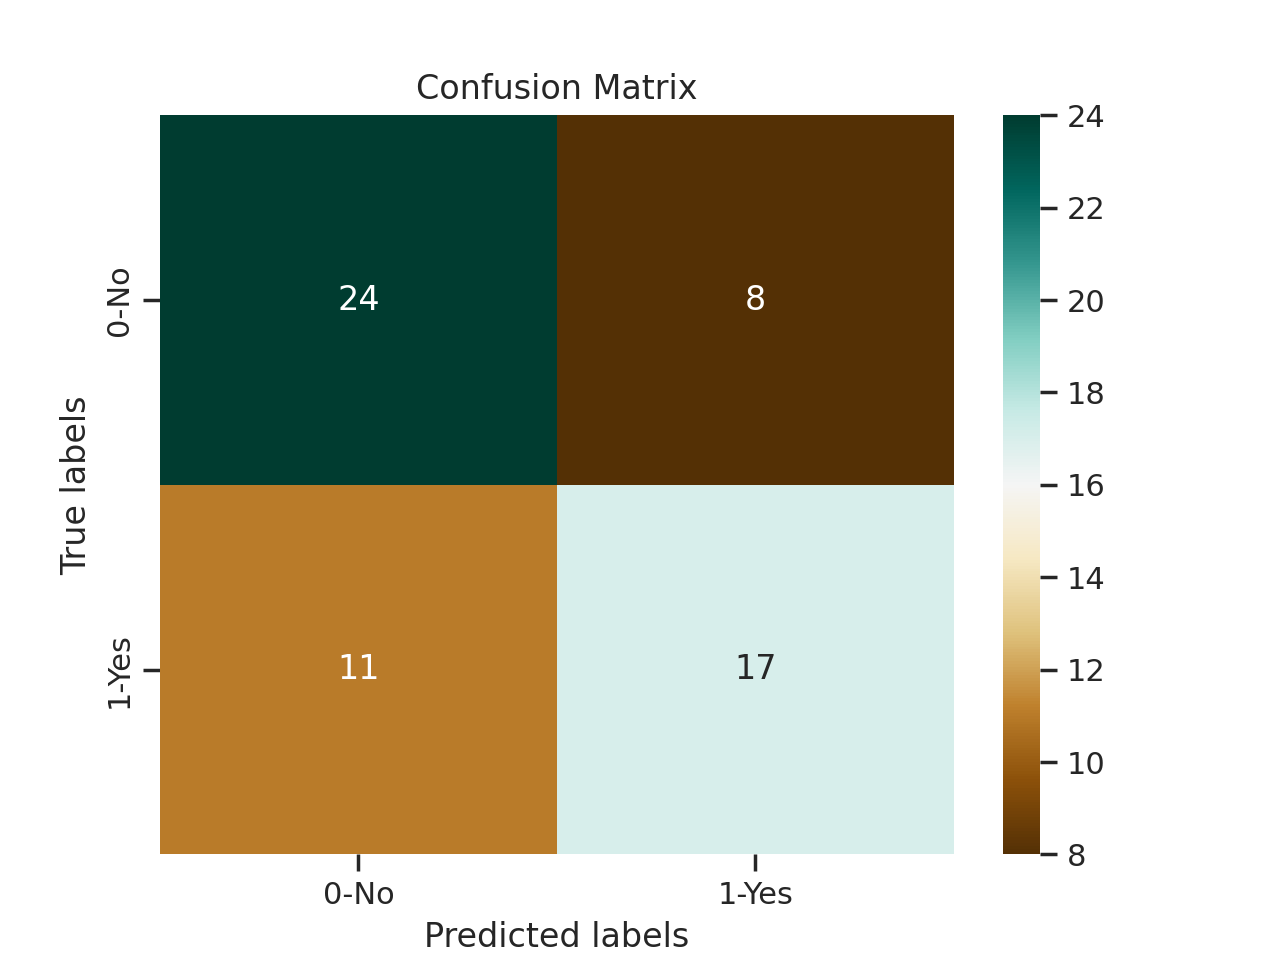

In [182]:
# Confusion Matrix for decision tree
y_pred_tree= simple_decision_tree.predict(X_test)
confusion_tree = metrics.confusion_matrix(y_test, y_pred_tree)

# Visualising the confusion matrix
labels = {'0-No', '1-Yes'}
ax= plt.subplot()
sns.heatmap(confusion_tree, annot=True, fmt='.0f', ax= ax, cmap="BrBG")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0-No', '1-Yes']); ax.yaxis.set_ticklabels(['0-No', '1-Yes'])

**Classification report for decision tree with no pruning**

In [183]:
# Classification Report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        32
           1       0.68      0.61      0.64        28

    accuracy                           0.68        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.68      0.68      0.68        60



**Graphical representation of decision tree with no pruning**

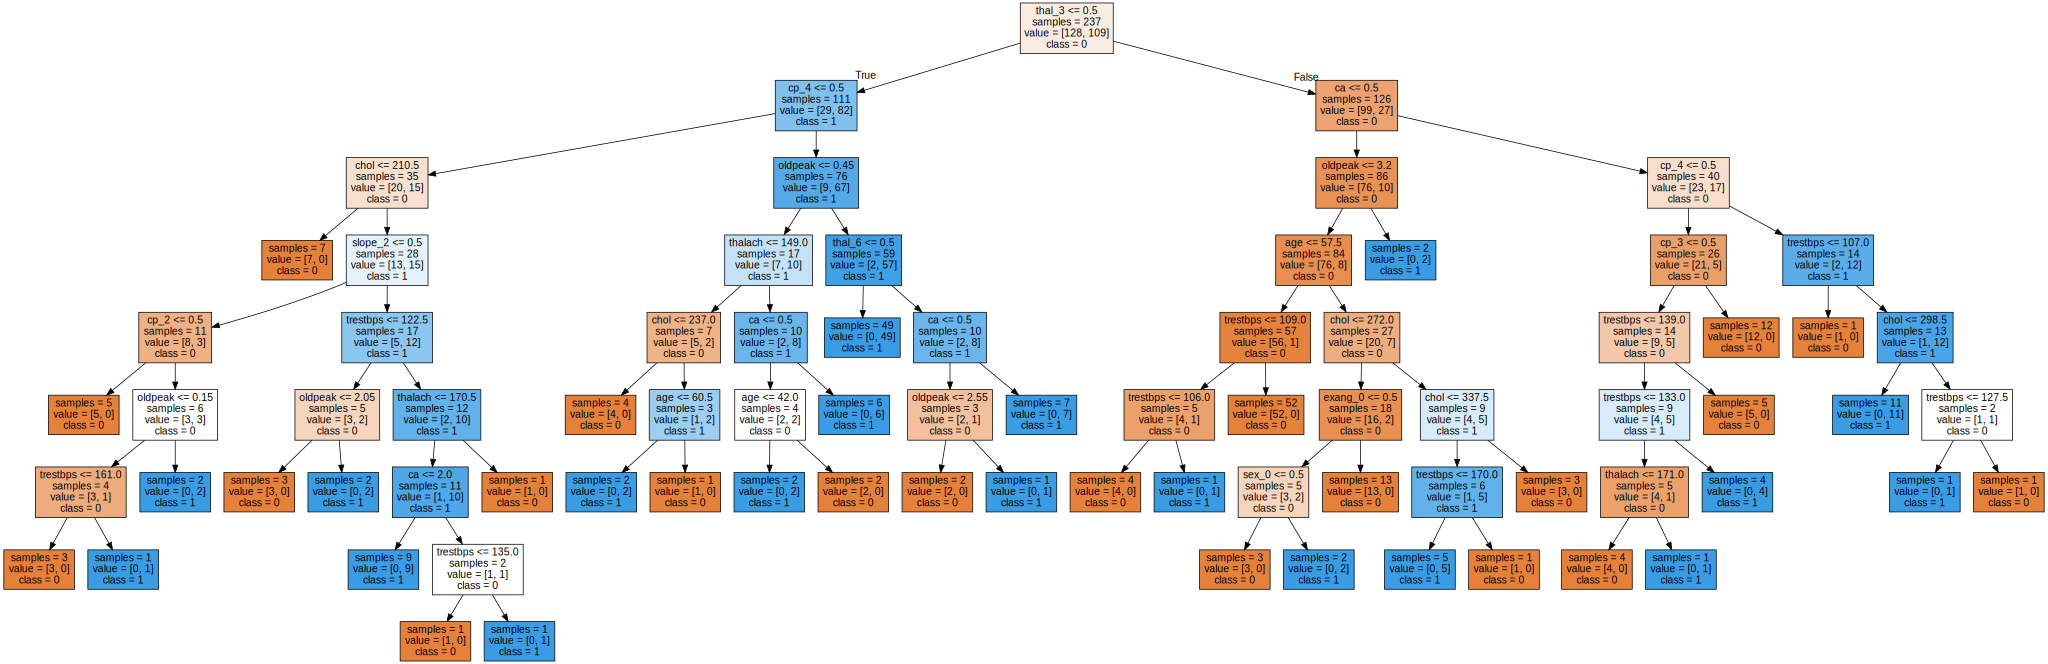

In [184]:
from sklearn.tree import export_graphviz
export_graphviz(simple_decision_tree, out_file='tree.dot', class_names=["0","1"],
                feature_names=X.columns, impurity=False, filled=True)

import graphviz
import os

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<br>


**2. Decision tree with pre-pruning**

In [185]:
# Select a maximum depth. For this analysis, maximum depth of 3 is selected.
decision_tree_max_depth3 = DecisionTreeClassifier(random_state=0, max_depth = 3)
decision_tree_max_depth3.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(decision_tree_max_depth3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(decision_tree_max_depth3.score(X_test, y_test)))

Accuracy on training set: 0.844
Accuracy on test set: 0.800


**Confusion matrix for decision tree with pre-pruning**

[Text(0, 0.5, '0-No'), Text(0, 1.5, '1-Yes')]

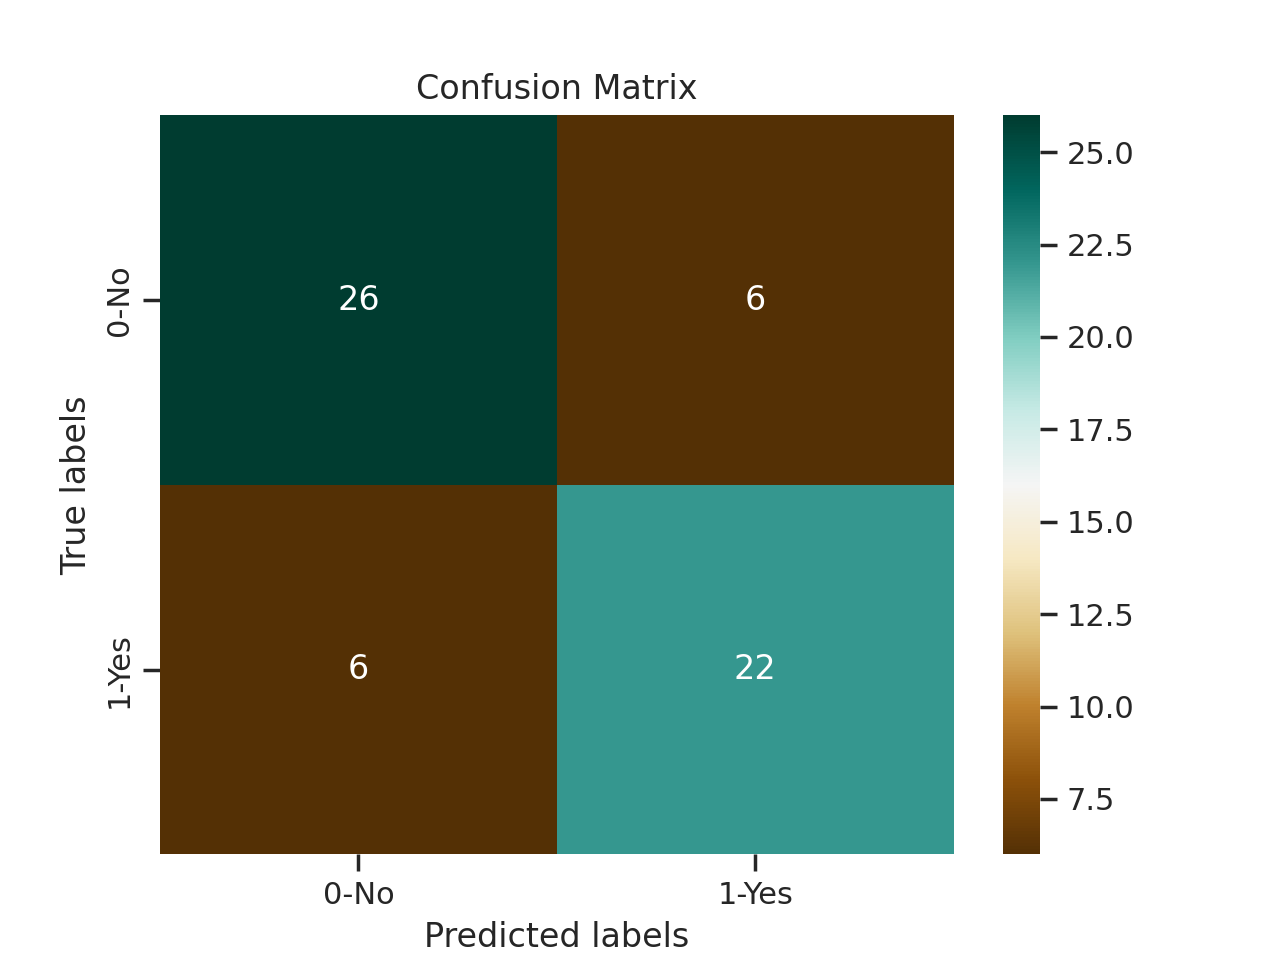

In [186]:
# Confusion Matrix for decision tree
y_pred_tree_max_depth3= decision_tree_max_depth3.predict(X_test)
confusion_tree_max_depth3 = metrics.confusion_matrix(y_test, y_pred_tree_max_depth3)

# Visualising the confusion matrix
labels = {'0-No', '1-Yes'}
ax= plt.subplot()
sns.heatmap(confusion_tree_max_depth3, annot=True, fmt='.0f', ax= ax, cmap="BrBG")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0-No', '1-Yes']); ax.yaxis.set_ticklabels(['0-No', '1-Yes'])

**Classification report for decision tree with pre-pruning**

In [187]:
# Classification Report
print(classification_report(y_test, y_pred_tree_max_depth3))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.79      0.79      0.79        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



**Graphical representation of decision tree with pre-pruning**

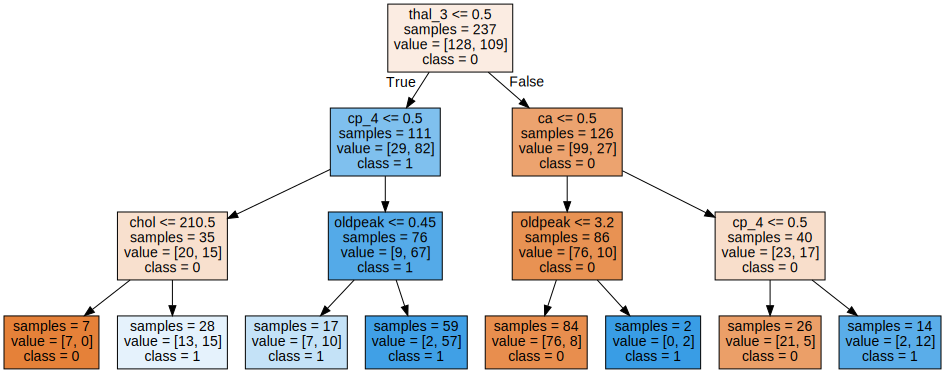

In [188]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree_max_depth3, out_file='tree.dot', class_names=["0","1"],
                feature_names=X.columns, impurity=False, filled=True)

import graphviz
import os

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<br>

<br>

**3. Gradient boosted decision trees**

In [190]:
import warnings; warnings.simplefilter('ignore')
from sklearn.ensemble import GradientBoostingClassifier

In [191]:
gbt = GradientBoostingClassifier(random_state=0)

In [192]:
gbt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [193]:
print("Accuracy on training set: {:.3f}".format(gbt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbt.score(X_test, y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.817


**Confusion matrix for gradient boosted decision trees**

[Text(0, 0.5, '0-No'), Text(0, 1.5, '1-Yes')]

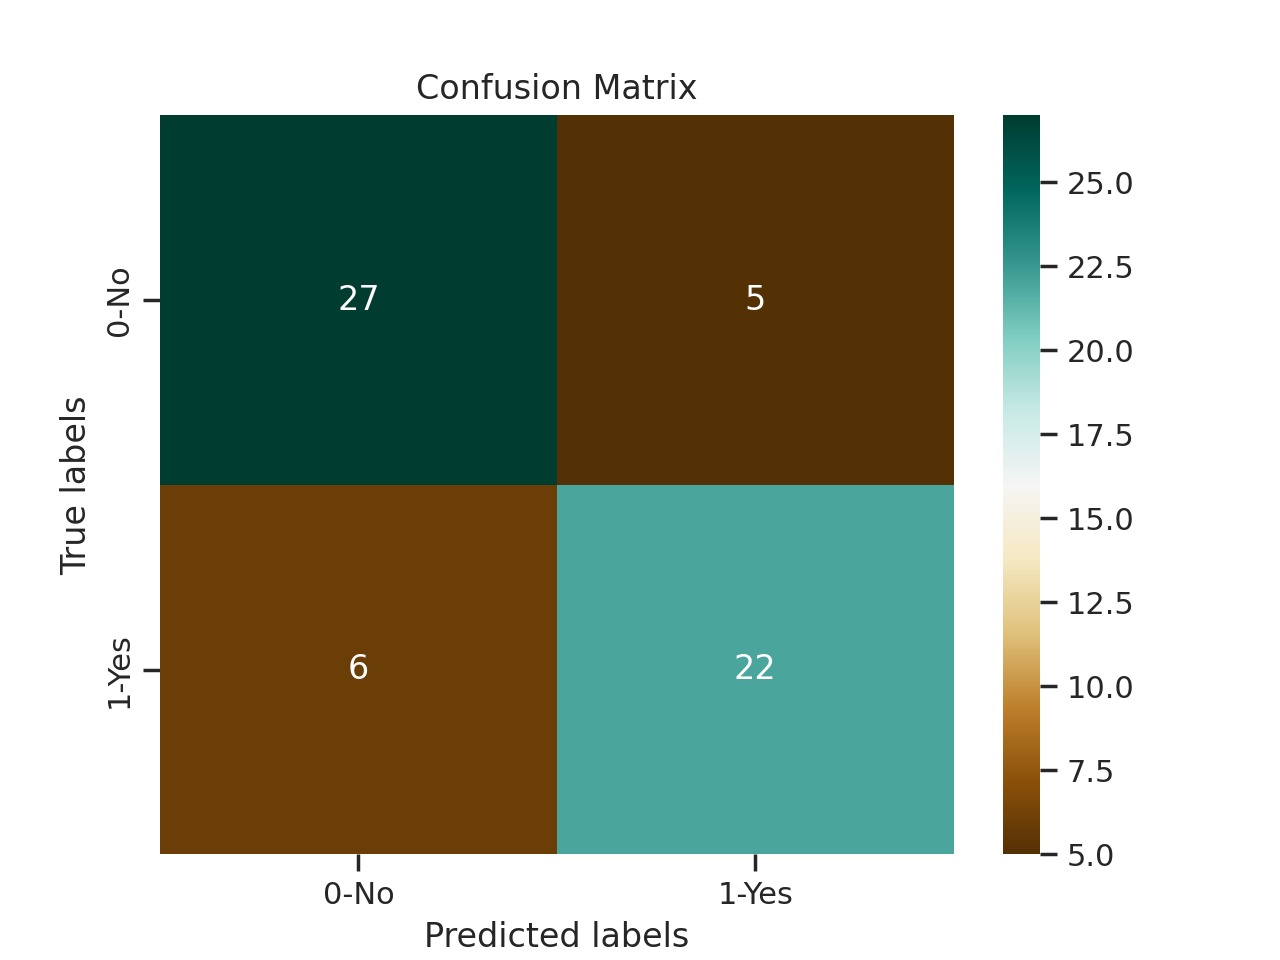

In [194]:
# Confusion Matrix for decision tree
y_pred_gbt = gbt.predict(X_test)
confusion_tree_gbt = metrics.confusion_matrix(y_test, y_pred_gbt)

# Visualising the confusion matrix
labels = {'0-No', '1-Yes'}
ax= plt.subplot()
sns.heatmap(confusion_tree_gbt, annot=True, fmt='.0f', ax= ax, cmap="BrBG")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0-No', '1-Yes']); ax.yaxis.set_ticklabels(['0-No', '1-Yes'])

**Classification report for gradient boosted decision trees**

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_gbt))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.81      0.79      0.80        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60



For the decision tree implementations, below is a summary of the relevant results:

* decision tree with no pruning: **accuracy = 0.68; F1 score = 0.64**
* decision tree with pre-pruning: **accuracy = 0.80; F1 score = 0.79**
* gradient boosted decision trees: **accuracy = 0.82; F1 score = 0.80**

The **gradient boosted decision trees** model outperforms  the other two decision trees.


<br>

### **IV. Conclusion**

In this project, supervised machine learning techniques such as KNN algorithm, logistic regression models, and decision trees were evaluated in the prediction of heart disease in patients based on the features provided in the dataset. Based on the model performances, the **KNN algorithm (K=5) has the highest accuracy of 90% and highest F1 score of 0.89** in classifying patients whether with or without heart disease. Furthermore, F1 score is the preferred metric for evaluating the models given that the project objective is predicting heart disease which has significant medical implications. Thus, it is not only important to identify correctly the true positives but it is also crucial to have minimal false negatives.